In [78]:
import pandas as pd

df=pd.read_csv("3.11.1.csv")
df

,fuerza del brazo (x),Levantamiento dinámico (y)
0,17.3,71.7
1,19.3,48.3
2,19.5,88.3
3,19.7,75.0
4,22.9,91.7
5,23.1,100.0
6,26.4,73.3
7,26.8,65.0
8,27.6,75.0
9,28.1,88.3


In [79]:
df.describe()

,fuerza del brazo (x),Levantamiento dinámico (y)
count,25.000000,25.000000
mean,31.148000,82.000000
std,9.867207,14.129549
min,17.300000,48.300000
25%,26.400000,71.700000
50%,29.000000,85.000000
75%,36.000000,91.700000
max,55.900000,100.000000


In [117]:
import numpy as np

def calculate_b1(x: list, y:list):
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x = (np.array(x) - x_mean)
    y = (np.array(y) - y_mean)
    
    numerator = np.inner(x,b)
    denominator = np.inner(x,x)

    return numerator/denominator
        
def calculate_b0(x: list, y:list, b1:float):
    
    numerator = np.sum(y)-b1*np.sum(x)
    denominator = len(x)

    return numerator/denominator

In [121]:
b1 = calculate_b1(x=df["fuerza del brazo (x)"],y=df["Levantamiento dinámico (y)"])
b1

0.5608977925284184

In [122]:
b0 = calculate_b0(x=df["fuerza del brazo (x)"],y=df["Levantamiento dinámico (y)"],b1=b1)
b0

64.52915555832482

Por lo tanto

$$ \mu_{\gamma | x} = \beta_{0} + \beta_{1}  x = 64.5 + 0.56 x$$

In [123]:
b0 + b1 *30

81.35608933417737

$$\mu_{\gamma | 30}=81.35$$

In [144]:
# Imports necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
X_train = np.array(df["fuerza del brazo (x)"]).reshape(-1, 1)
y_train = np.array(df["Levantamiento dinámico (y)"])
 
# Creamos el objeto de Regresión Linear
model = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
model.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
predictions = model.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', model.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', model.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.56089779]
Independent term: 
 64.52915555832492
Mean squared error: 162.25
Variance score: 0.15


In [149]:
predictions

array([74.23268737, 75.35448295, 75.46666251, 75.57884207, 77.37371501,
       77.48589457, 79.33685728, 79.5612164 , 80.00993463, 80.29038353,
       80.34647331, 80.6269222 , 80.79519154, 81.13173022, 81.29999955,
       81.29999955, 81.52435867, 82.08525646, 84.72147609, 86.68461836,
       87.18942638, 89.37692777, 89.54519711, 92.7984043 , 95.88334216])

Text(0.5, 1.0, 'Residual plot')

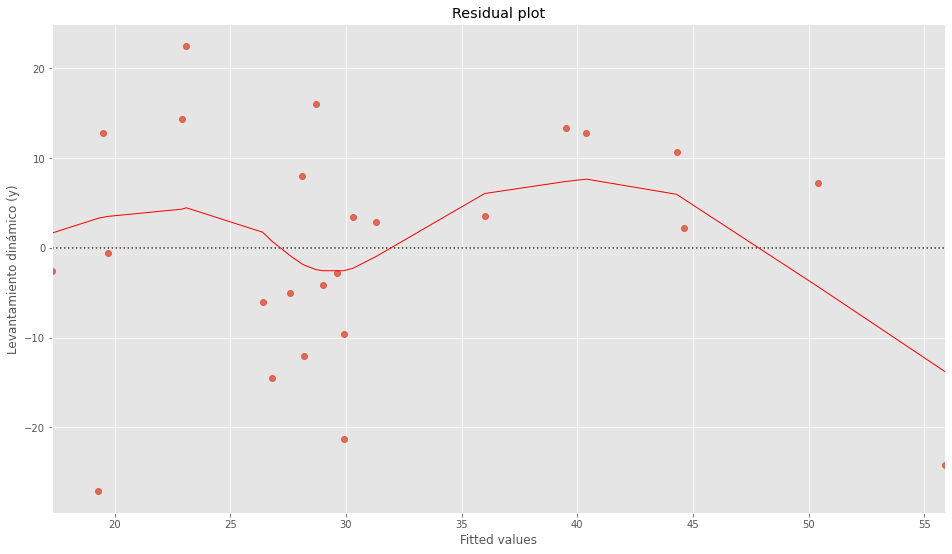

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


sns.residplot('fuerza del brazo (x)', "Levantamiento dinámico (y)",data=df,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')
